In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
%matplotlib inline
data = pd.read_csv('./Module_1_materials/day3/hochgerner_2018.data.gz',sep='\t',index_col=0)
anno = pd.read_csv('./Module_1_materials/day3/hochgerner_2018.anno',sep='\t',header=None)
anno = anno[1].values


In [2]:
#We will first normalize each cell by total count per cell.
percell_sum = data.sum(axis=0)
pergene_sum = data.sum(axis=1)

preprocessed_data = data / percell_sum.values[None, :] * np.median(percell_sum)
preprocessed_data = preprocessed_data.values

#transform the preprocessed_data array by `x := log (1+x)`
preprocessed_data = np.log(1 + preprocessed_data)

#standard scaling
preprocessed_data_mean = preprocessed_data.mean(axis=1)
preprocessed_data_std = preprocessed_data.std(axis=1)
preprocessed_data = (preprocessed_data - preprocessed_data_mean[:, None]) / \
                     preprocessed_data_std[:, None]



In [3]:
#preprocess by PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(preprocessed_data.T)
pca_data = pca.transform(preprocessed_data.T)

Text(0, 0.5, 'PC2')

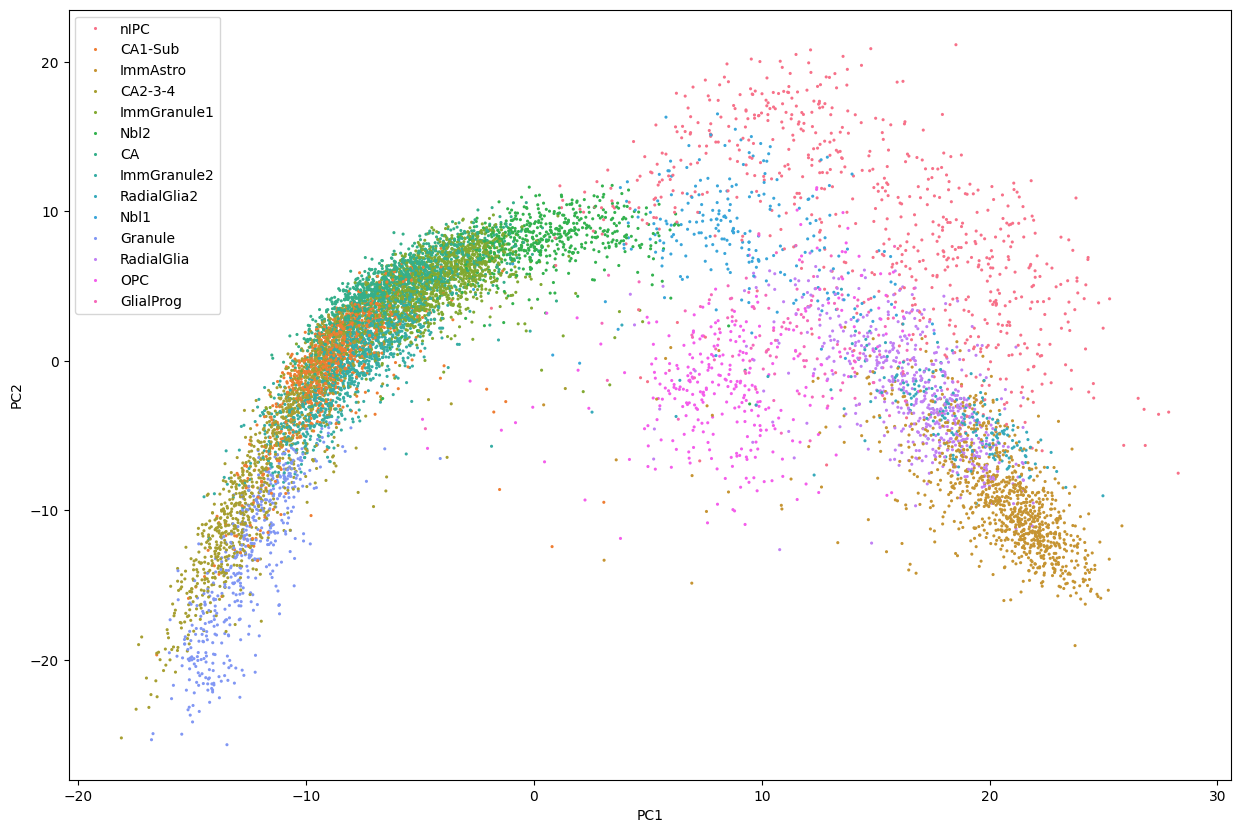

In [4]:
#visualize PCA result
plt.figure(figsize=(15,10))
seaborn.scatterplot(x=pca_data[:,0], y=pca_data[:,1], linewidth = 0, s=5, hue=anno)
plt.xlabel('PC1')
plt.ylabel('PC2')

##  GraphDR: nonlinear dimensionality reduction that preserves linear interpretability

GraphDR is a nonlinear dimensionality reduction method that preserves the linear interpretability while improving on cell type representation quality. GraphDR combines the advantages of linear methods such as PCA and nonlinear methods such as t-SNE. Unlike t-SNE, GraphDR is also suitable for comparison across datasets.

In [108]:
#write and apply your own GraphDR implementation here!
def graphdr(pca_data , lambda_, no_rotation=False,num_neighbors= 5000):
    
    n,p = pca_data.shape
    #print(n,p)
    #W = get_top_ith_eigenvectors()
    K = np.zeros((n,n))
    I = np.identity(n)
    A  = kneighbors_graph(pca_data,num_neighbors,mode='connectivity').toarray()
    L  = csgraph.laplacian(A, normed=False)
    #print(L)
    inverse_L = np.linalg.inv(I + lambda_* L)
    #print(inverse_L)
    mul = pca_data.T @inverse_L @pca_data
    eigenValues, eigenVectors = np.linalg.eig(A)

    idx = eigenValues.argsort()[-2:][::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    if no_rotation == False:
        W = eigvec [:,-2:]
    else :
        W = np.eye(n, 2) 
    print(eigvec)
    print(eigvec)
    print(eigval)
    Z = inverse_L @ pca_data @ W
    #print(Z.shape)
    #print(W.T @ W)
    return Z


In [ ]:
for i in [3000]:
    graphdr_result = graphdr(pca_data,0.001, no_rotation=False,num_neighbors=i)
    plt.figure(figsize=(15,10))
    seaborn.scatterplot(x=graphdr_result[:,0], y=graphdr_result[:,1], linewidth = 0, s=3, hue=anno)
    plt.xlabel('GraphDR 1')
    plt.ylabel('GraphDR 2')

Text(0, 0.5, 'GraphDR 2')

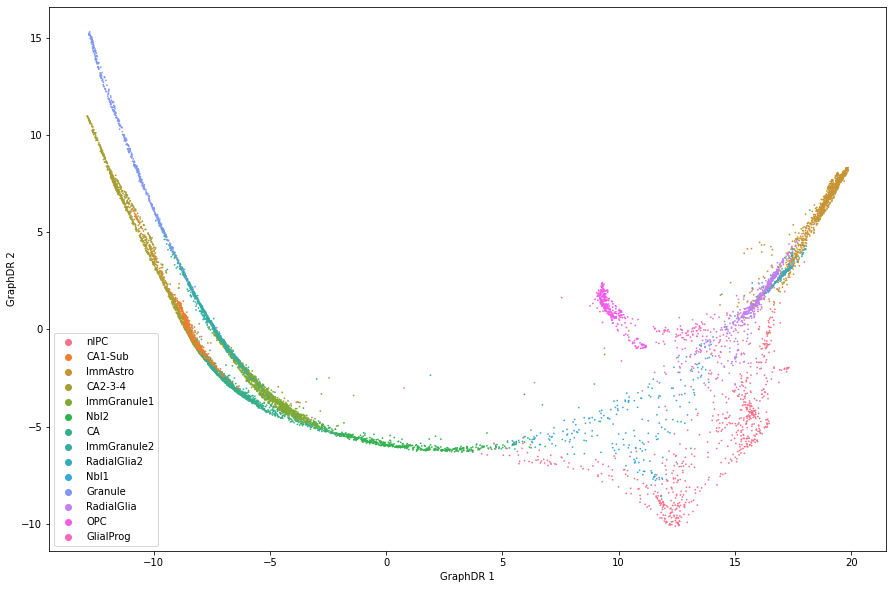

In [10]:
#compare your graphdr output with this one, it should look similar (remember to adjust lambda_ and see its effect)

plt.figure(figsize=(15,10))
seaborn.scatterplot(x=graphdr_data[:,0], y=graphdr_data[:,1], linewidth = 0, s=3, hue=anno)
plt.xlabel('GraphDR 1')
plt.ylabel('GraphDR 2')